 ###  PIMA INDIANS LOGISTIC CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
ind_pima = pd.read_csv(r"C:\Users\ADMIN\Downloads\pima-indians-diabetes.data", names = column_names)
ind_pima.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [3]:
pima_bk = ind_pima.copy()

# exploratory data analysis / knowing the data

In [4]:
ind_pima.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [5]:
ind_pima.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
ind_pima.shape

(768, 9)

# analysing on the basis "class" in the data 

In [7]:
ind_pima["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4764\2075437774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ind_pima["class"])


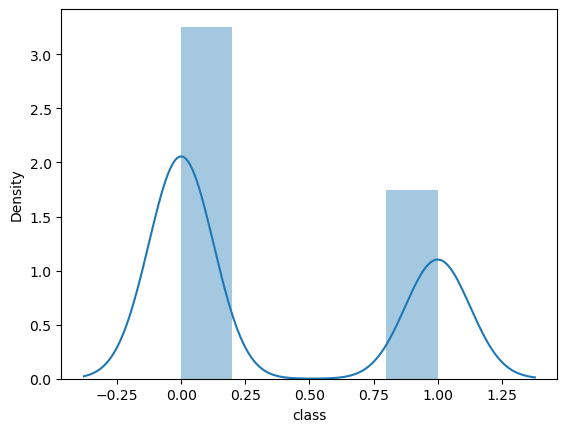

In [8]:
sns.distplot(ind_pima["class"])
plt.show()

In [9]:
ind_pima.corr()

preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

<Axes: >

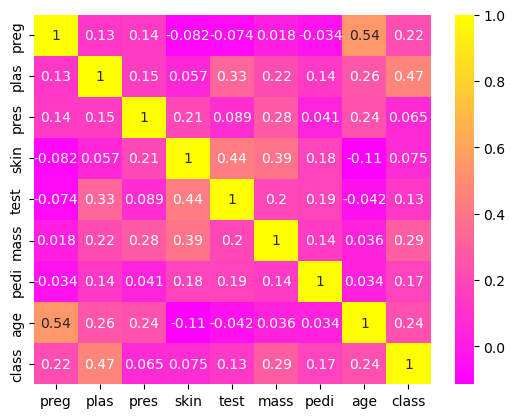

In [10]:
sns.heatmap(ind_pima.corr(),annot=True, cmap="spring")

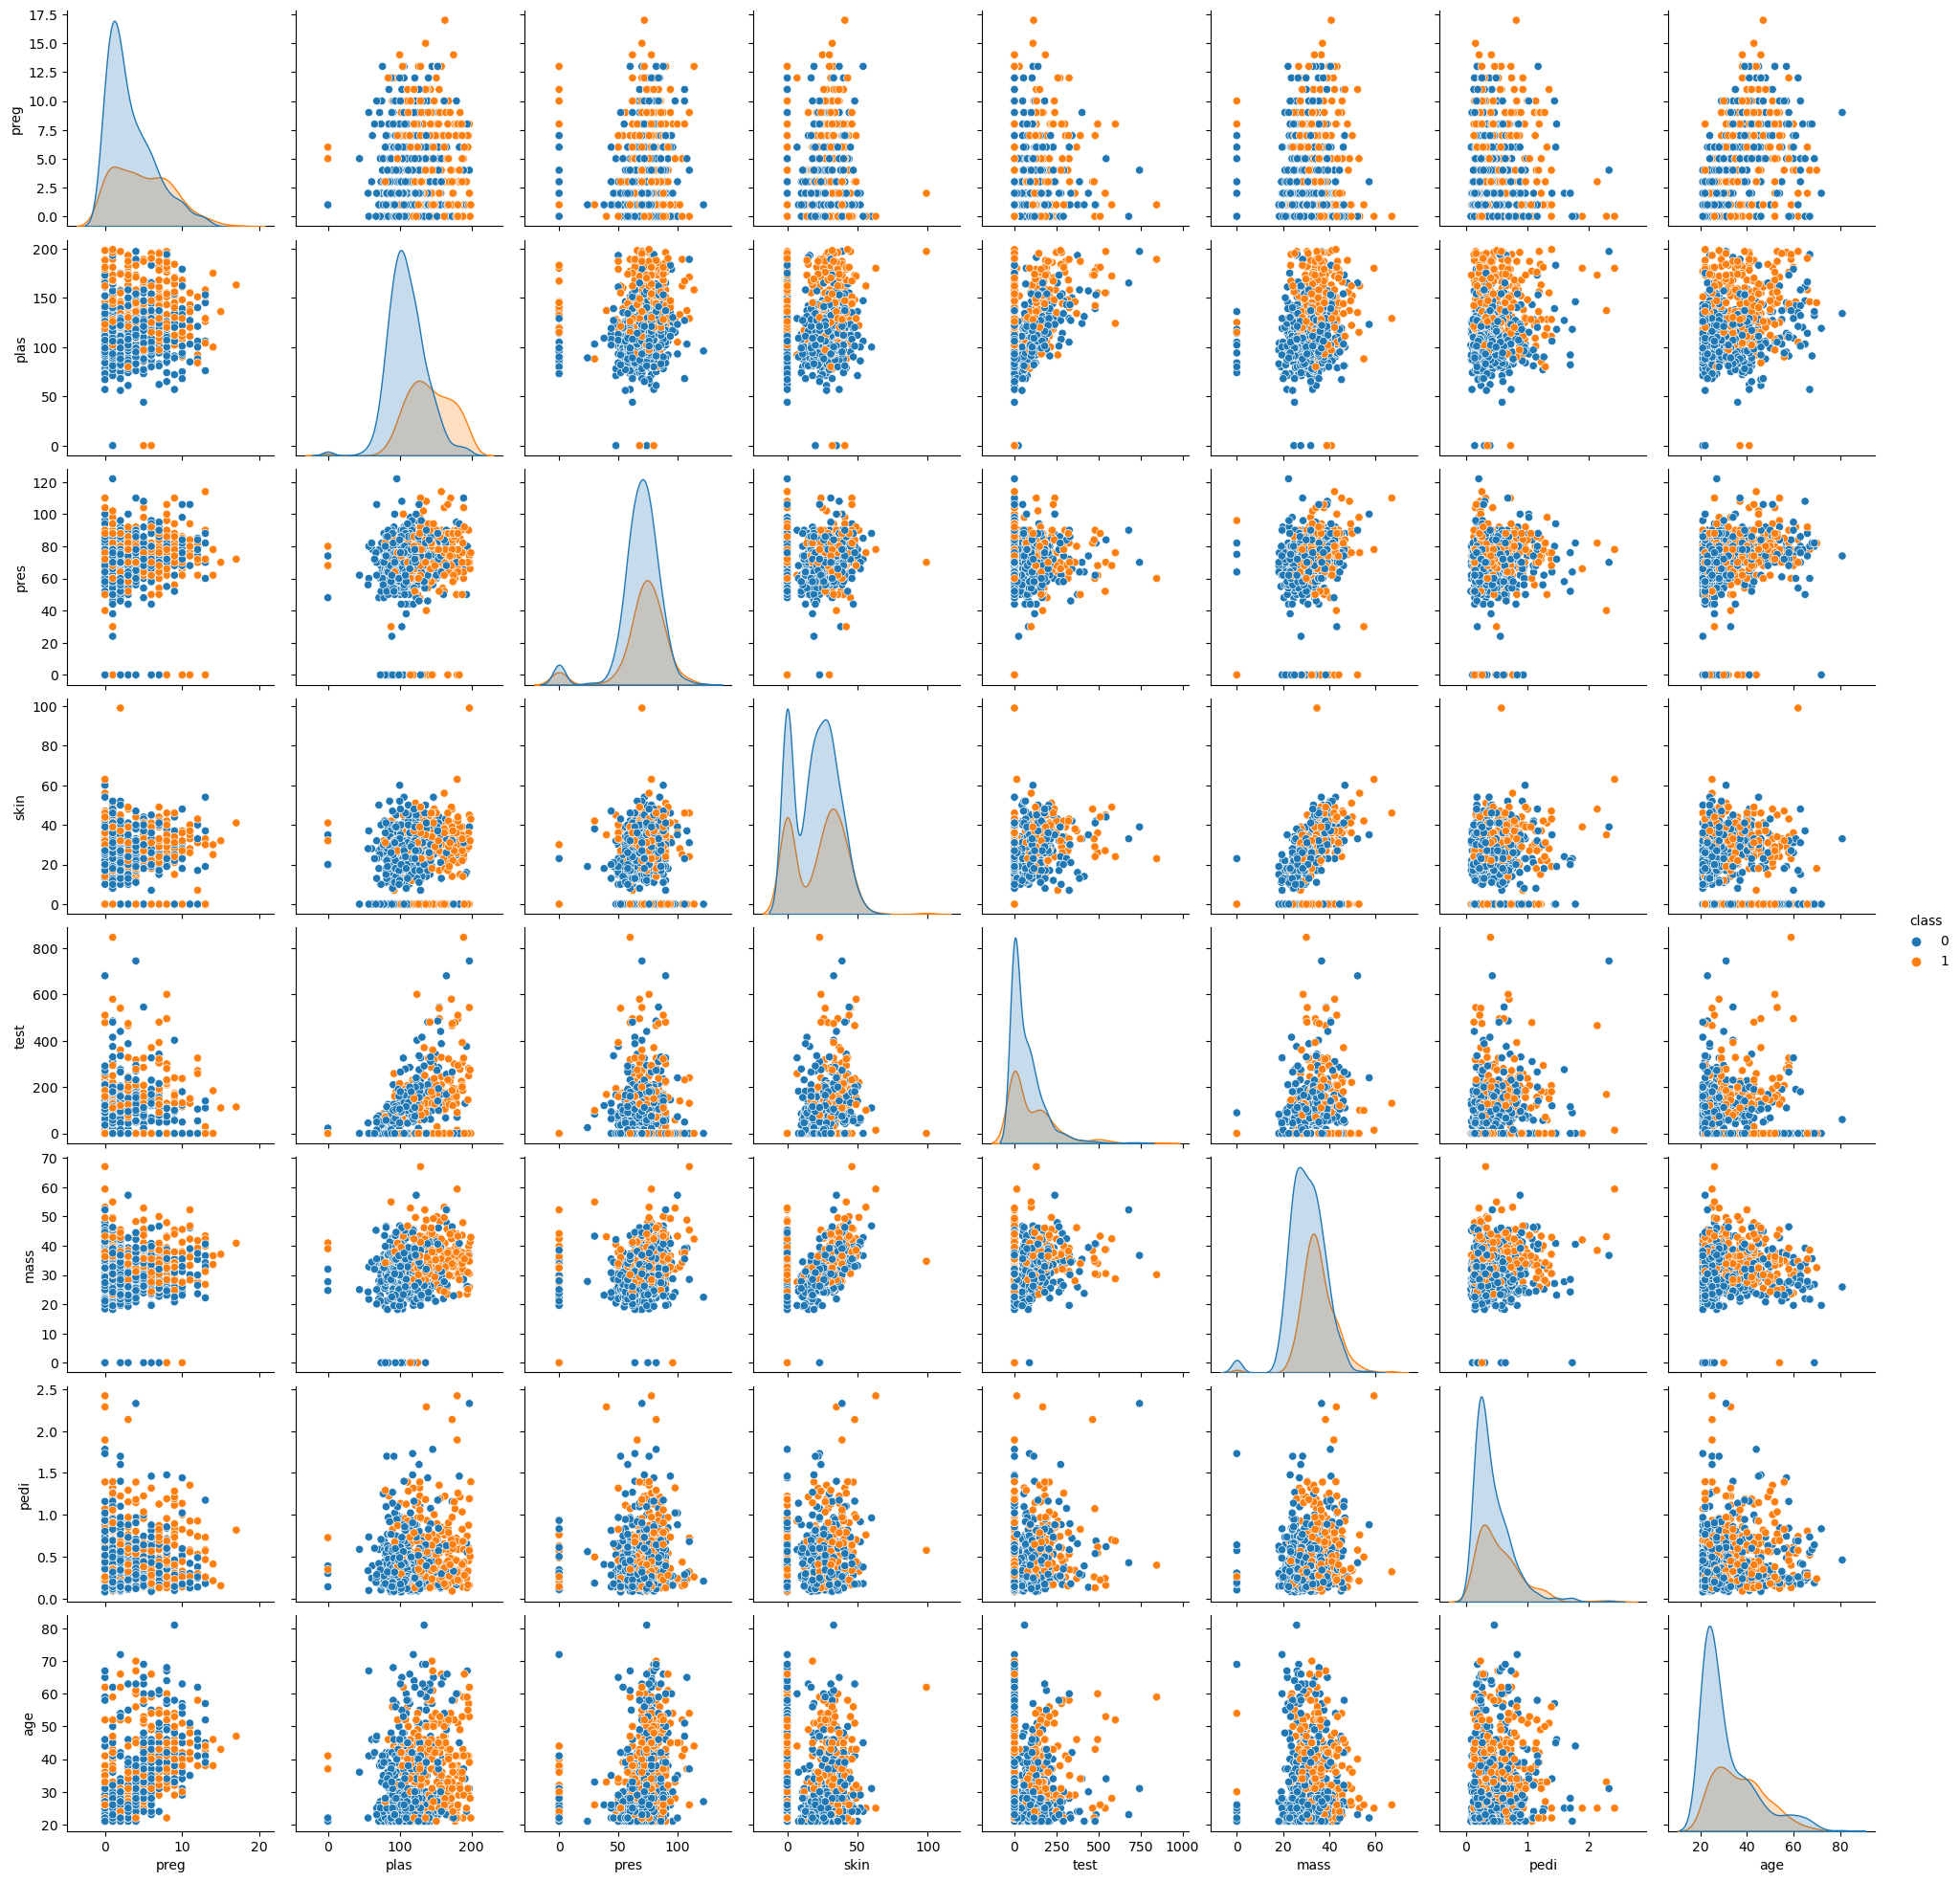

In [11]:
sns.pairplot(ind_pima, hue = 'class')

# applying train,test,split.  

In [12]:
array = ind_pima.values

In [13]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [14]:
x = array[:, 0:7]
y = array[:,8]
t_size = 0.30
seed = 7

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=t_size, random_state=seed)
type(X_train)

numpy.ndarray

###  logistic regression 

In [16]:
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
prediction = regression_model.predict(X_test)

In [18]:
reg_score = regression_model.score(X_train, y_train)
reg_score

0.7877094972067039

In [19]:
reg_score2 = regression_model.score(X_test, y_test)
reg_score2

0.7619047619047619

In [20]:
from sklearn import metrics

In [21]:
print(reg_score2)

0.7619047619047619


In [22]:
print(metrics.confusion_matrix(y_test, prediction))

[[131  16]
 [ 39  45]]


In [23]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       147
         1.0       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



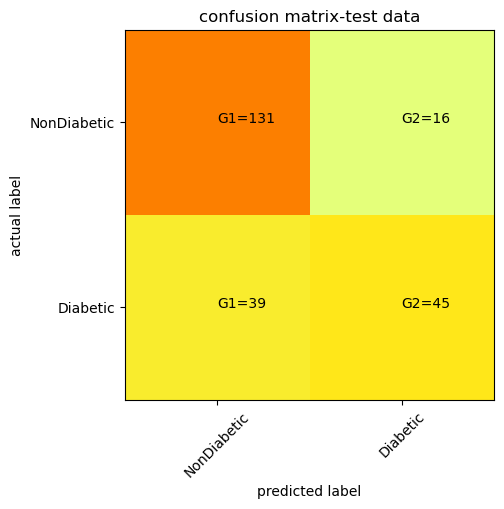

In [24]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ["NonDiabetic", "Diabetic"]
plt.title("confusion matrix-test data")
plt.ylabel('actual label')
plt.xlabel('predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
S = [['G1','G2'], ['G1','G2']]

for i in range(2):
    for j in range(2):
        plt.text(j,i,str(S[i][j])+"="+str(cm[i][j]))
        
plt.show()